<a href="https://colab.research.google.com/github/priyanka-261296/ml-project/blob/main/credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [31]:
df= pd.read_csv('/content/creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [33]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [34]:
df=df.dropna()

In [36]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73376 entries, 0 to 73375
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73376 non-null  int64  
 1   V1      73376 non-null  float64
 2   V2      73376 non-null  float64
 3   V3      73376 non-null  float64
 4   V4      73376 non-null  float64
 5   V5      73376 non-null  float64
 6   V6      73376 non-null  float64
 7   V7      73376 non-null  float64
 8   V8      73376 non-null  float64
 9   V9      73376 non-null  float64
 10  V10     73376 non-null  float64
 11  V11     73376 non-null  float64
 12  V12     73376 non-null  float64
 13  V13     73376 non-null  float64
 14  V14     73376 non-null  float64
 15  V15     73376 non-null  float64
 16  V16     73376 non-null  float64
 17  V17     73376 non-null  float64
 18  V18     73376 non-null  float64
 19  V19     73376 non-null  float64
 20  V20     73376 non-null  float64
 21  V21     73376 non-null  float64
 22

In [38]:

x = df.iloc[: , 1:30].values
y = df.iloc[:, 30].values

In [39]:
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (73376, 29)
Output Range :  (73376,)


In [40]:
print ("Class Labels : \n", y)

Class Labels : 
 [0. 0. 0. ... 0. 0. 0.]


In [42]:
df.isnull().values.any()

False

Text(0, 0.5, 'No of occurences')

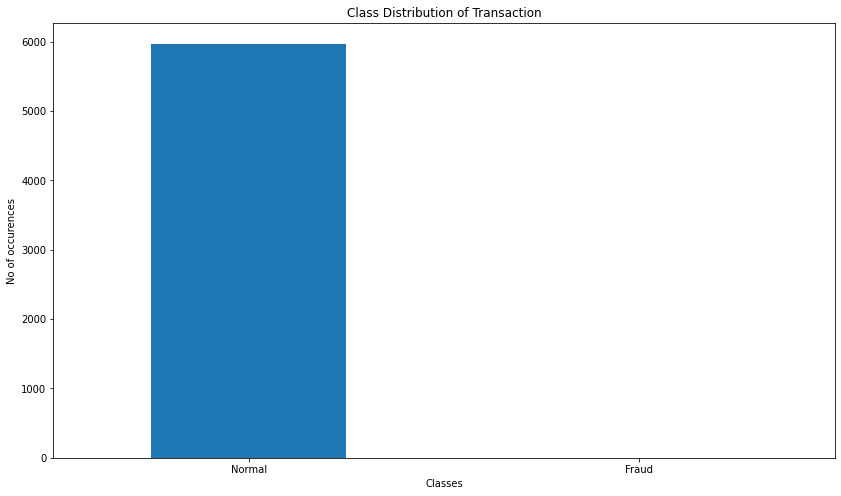

In [44]:

set_class = pd.value_counts(dataset['Class'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

In [46]:

fraud_data = df[df['Class']==1]

normal_data = df[df['Class']==0]



In [47]:

print(fraud_data.shape,normal_data.shape)

(178, 31) (73198, 31)


In [48]:
fraud_data.Amount.describe()

count     178.000000
mean       95.191461
std       218.660540
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [49]:
normal_data.Amount.describe()

count    73198.000000
mean        97.324727
std        270.324183
min          0.000000
25%          7.680000
50%         26.675000
75%         88.947500
max      19656.530000
Name: Amount, dtype: float64

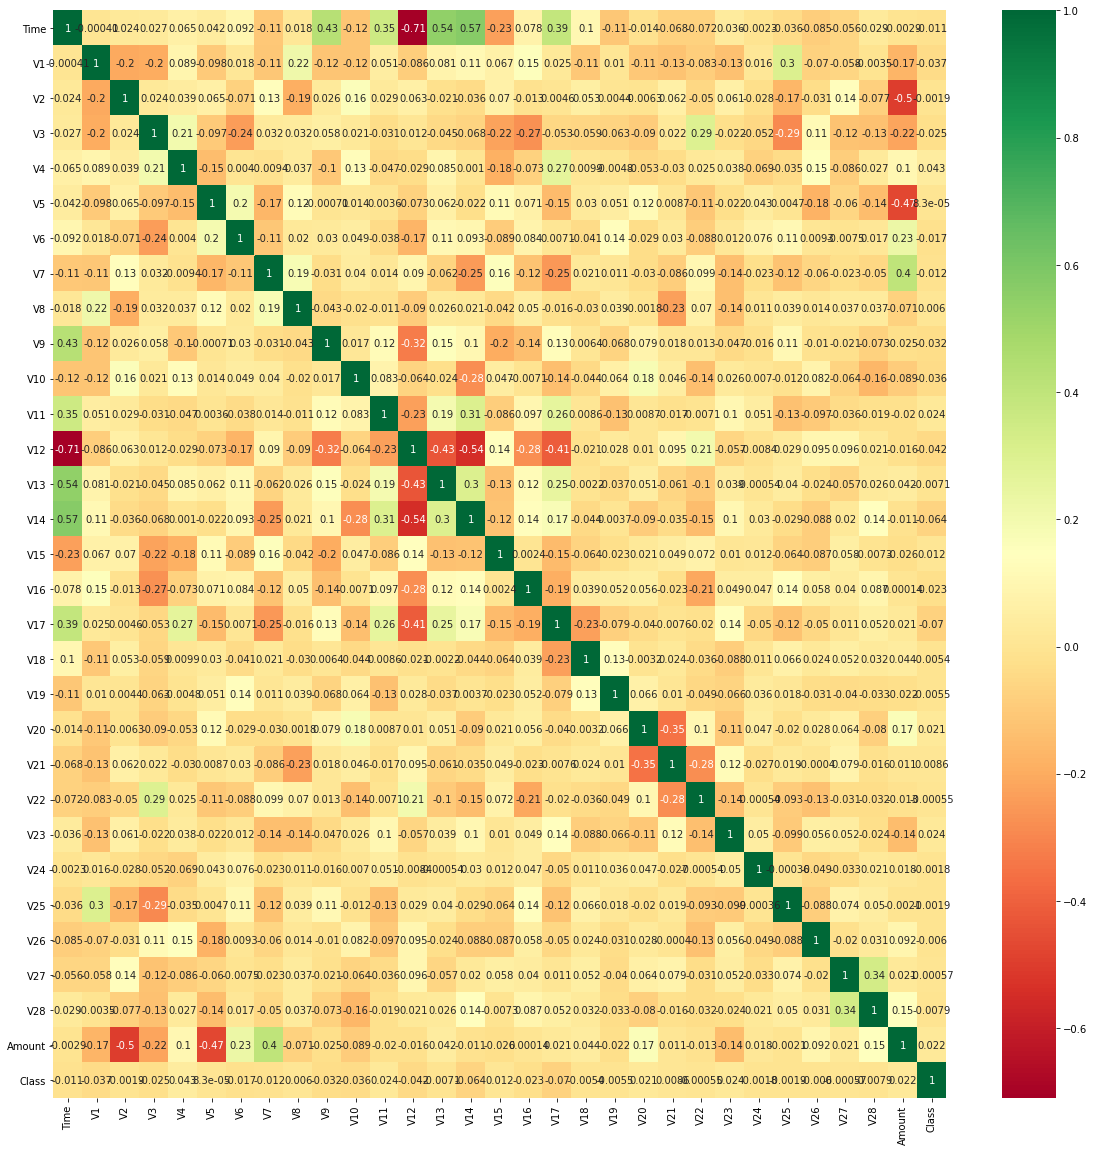

In [50]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

In [53]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (55032, 29)
xtest.shape  :  (18344, 29)
ytrain.shape :  (55032,)
ytest.shape  :  (18344,)


In [54]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [55]:
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [-0.36888913  0.14476387 -0.34818734 -0.92723725 -1.50699093  0.79935207
 -0.08889932  0.7032212   2.99273307 -2.00993076 -1.99050686 -1.99742485
  0.58923211  1.08841885 -1.17624581 -0.80091511  1.27389126  1.3486146
  2.69564143 -0.2304725  -0.06927748  0.78517408  0.00756172 -1.655161
 -0.09911786  0.54685887  0.16888633 -0.34404704  0.68492808]


In [56]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [57]:

y_pred_decision_tree = dt_classifier.predict(xtest)

In [58]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0. 0. 0. ... 0. 0. 0.]


In [59]:

com_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Matrix : \n", com_decision)

confusion Matrix : 
 [[18293     9]
 [   10    32]]


In [60]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  99.8964238988225
Error_rate_Decison  :  0.10357610117749673
Specificity_Decison :  78.04878048780488
Sensitivity_Decison :  99.94536414795388


In [61]:

svc_classifier = SVC(kernel = 'rbf', random_state =0)
svc_classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [62]:
y_pred2 = svc_classifier.predict(xtest)

In [63]:
print("y_pred_randomforest : \n", y_pred2)

y_pred_randomforest : 
 [0. 0. 0. ... 0. 0. 0.]


In [64]:

cm2 = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix : \n\n", cm2)

Confusion Matrix : 

 [[18301     1]
 [   13    29]]


In [65]:
# Validating the Prediction
Accuracy_Model = ((cm2[0][0] + cm2[1][1]) / cm2.sum()) *100
print("Accuracy_svc    : ", Accuracy_Model)

Error_rate_Model = ((cm2[0][1] + cm2[1][0]) / cm2.sum()) *100
print("Error_rate_svc  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (cm2[1][1] / (cm2[1][1] + cm2[0][1])) *100
print("Specificity_svc : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model= (cm2[0][0] / (cm2[0][0] + cm2[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_Model)

Accuracy_svc    :  99.92368076755342
Error_rate_svc  :  0.07631923244657654
Specificity_svc :  96.66666666666667
Sensitivity_svc :  99.92901605329256
